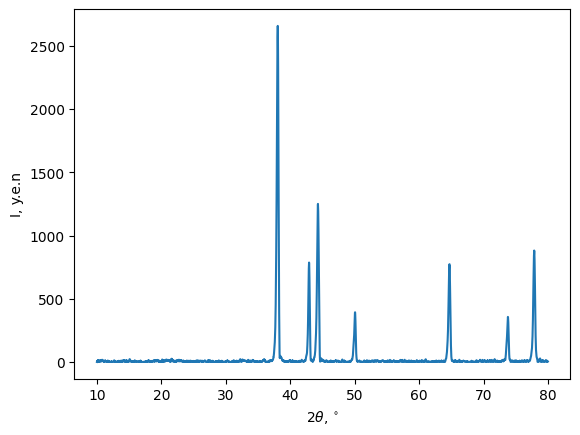

           I  sin(theta)  sin(theta)**2         d  2*theta
0        0.0    0.087156       0.007596  8.845315    10.00
847      0.0    0.232936       0.054259  3.309576    26.94
851      0.0    0.233615       0.054576  3.299958    27.02
852      0.0    0.233785       0.054655  3.297563    27.04
853      0.0    0.233954       0.054735  3.295171    27.06
854      0.0    0.234124       0.054814  3.292783    27.08
855      0.0    0.234294       0.054894  3.290398    27.10
856      0.0    0.234463       0.054973  3.288017    27.12
857      0.0    0.234633       0.055053  3.285640    27.14
860      0.0    0.235142       0.055292  3.278528    27.20
2472     0.0    0.495762       0.245780  1.555021    59.44
2471     0.0    0.495610       0.245630  1.555496    59.42
2470     0.0    0.495459       0.245479  1.555972    59.40
2469     0.0    0.495307       0.245329  1.556449    59.38
2466     0.0    0.494852       0.244879  1.557880    59.32
873      0.0    0.237347       0.056334  3.248074    27.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
theta = []
intense = []
data = {'I':[], 'sin(theta)':[], 'sin(theta)**2':[], 'd' : [], '2*theta':[]}
with open('data.txt', 'r') as file:
    for line in file:
        data['2*theta'].append(float(line.split()[0]))
        data['I'].append(float(line.split()[1]))
        sin = np.sin(np.radians(float(line.split()[0]) / 2))
        data['sin(theta)'].append(sin)
        data['sin(theta)**2'].append(sin ** 2)
        data['d'].append(1.54184 / (2 * sin))

plt.plot(data['2*theta'], data['I'])
plt.xlabel(r'$2\theta, ^\circ$')
plt.ylabel('I, y.e.n')
plt.show()
t = pd.DataFrame(data)
print(t.sort_values('I'))

In [3]:
from scipy.signal import find_peaks
peaks = []
idx, _ = find_peaks(data['I'], height=200)
print(list(idx))
for i in idx:
    peaks.append(data['I'][i])
t = t.drop(1645)
t = t[t['I'].isin(peaks)]
# i_max = t['I'].max()
# print(t.apply(lambda i : round((i / i_max) * 100)))
t['hkl'] = [(1,1,1), (1,1,1), (2,0,0), (2,0,1), (2,2,0), (3,0,1), (3,0,0)]
t

[1403, 1646, 1715, 2003, 2736, 3189, 3393]


,I,sin(theta),sin(theta)**2,d,2*theta,hkl
1403,2658.0,0.326063,0.106317,2.364327,38.06,"(1, 1, 1)"
1646,786.0,0.365852,0.133847,2.107193,42.92,"(1, 1, 1)"
1715,1250.0,0.377033,0.142154,2.044703,44.30,"(2, 0, 0)"
2003,393.0,0.423093,0.179007,1.822106,50.06,"(2, 0, 1)"
2736,773.0,0.535237,0.286479,1.440333,64.72,"(2, 2, 0)"
3189,356.0,0.600281,0.360337,1.284266,73.78,"(3, 0, 1)"
3393,881.0,0.628370,0.394849,1.226856,77.86,"(3, 0, 0)"


In [4]:
sins = list(t['sin(theta)'])

hkl = {
'1': (1 ,1, 1),
'2': (1, 1, 1), 
'3': (2, 0, 0), 
'4': (2, 0, 1),
'5': (2, 2, 0), 
'6': (3, 0, 1),
'7': (3, 0, 0)
}

hkl = [(1,1,1), (1,1,1), (2,0,0), (2,0,1), (2,2,0), (3,0,1), (3,0,0)]

for i in hkl:
    print(i, (i[0]^2+i[1]^2+i[2]^2))

(1, 1, 1) 3
(1, 1, 1) 3
(2, 0, 0) 0
(2, 0, 1) 1
(2, 2, 0) 6
(3, 0, 1) 0
(3, 0, 0) 1


In [5]:
a_i = []
for i in range(7):
    a_i.append((1.54184 * np.sqrt(sum(map(lambda x : x**2, hkl[i])))) / (2 * sins[i]))

print(f'hkl             a')
for i in range(7):
    print(f'{hkl[i]}     {a_i[i]}')

print((4.095134567677063 + 4.089406909913419+ 4.074353776597333 + 4.073877878186323 + 4.061205562055839) / 5)
print((3.649765831075864 + 3.680567677776846) / 2)

hkl             a
(1, 1, 1)     4.095134567677063
(1, 1, 1)     3.649765831075864
(2, 0, 0)     4.089406909913419
(2, 0, 1)     4.074353776597333
(2, 2, 0)     4.073877878186323
(3, 0, 1)     4.061205562055839
(3, 0, 0)     3.680567677776846
4.0787957388859954
3.6651667544263553


In [13]:
t['cos(theta)'] = np.cos(t['2*theta'] / 2)
t

,I,sin(theta),sin(theta)**2,d,2*theta,hkl,cos(theta)
1403,2658.0,0.326063,0.106317,2.364327,38.06,"(1, 1, 1)",0.983764
1646,786.0,0.365852,0.133847,2.107193,42.92,"(1, 1, 1)",-0.862226
1715,1250.0,0.377033,0.142154,2.044703,44.30,"(2, 0, 0)",-0.987410
2003,393.0,0.423093,0.179007,1.822106,50.06,"(2, 0, 1)",0.994727
2736,773.0,0.535237,0.286479,1.440333,64.72,"(2, 2, 0)",0.586494
3189,356.0,0.600281,0.360337,1.284266,73.78,"(3, 0, 1)",0.690141
3393,881.0,0.628370,0.394849,1.226856,77.86,"(3, 0, 0)",0.333401


In [40]:
cos = np.array(t['cos(theta)'])
sin = np.array(t['sin(theta)'])
hkl = np.array(t['hkl'])

g = []

for i in range(len(hkl)):
    g.append((0.71 / 2) * np.sqrt(sum(map(lambda x : x**2, hkl[i]))) * np.abs(cos[i] / (sin[i]**2)))
t['d_a_i_th'] = g
t
t1 = 2.776
t2= 12.706
a1 = [4.095134567677063,4.089406909913419,4.074353776597333,4.073877878186323, 4.061205562055839]
a2 = [3.649765831075864, 3.680567677776846]
s0_1 = np.sqrt(np.sum((a1 - np.mean(a1))**2)/(len(a1) * (len(a1) - 1)))
s0_2 = np.sqrt(np.sum((a2 - np.mean(a2))**2)/(len(a2) * (len(a2) - 1)))
print(s0_1, s0_2)
t['d_sluch'] = [s0_1, s0_2, s0_1, s0_1, s0_1,s0_1, s0_2]

t['DELTA'] = np.sqrt(t['d_sluch'] ** 2 + t['d_a_i_th'] ** 2)
t

delta_a2 = np.sqrt(5) * (5.689534**(-2) + 4.931716**(-2) + 4.411095**(-2) + 2.055634**(-2) + 2.150104**(-2)) ** (-0.5)
delta_a2

0.0060534493497034145 0.015400923350491036


2.945347689949761